# Assignmnet 2

# Задание 1. k-NN performs worse than Logistic Regression

Для того чтобы найти такой случай, посмотрим на то, как работают 2 алгоритма и в чем их различие. Так, если лог.регрессия, грубо говоря, проводит линию между 2 множествами, рассекая их на 2 класса, то k-NN - это метод, который смотрит на соседей того объекта, которому надо приписать класс и определяет его класс по neighbours' plurality vote, т. е. по тому, соседей какого класса к нему больше ближе расположено.

Следовательно, нам нужно создать 2 таких множества, элементы которых были бы расположены на dimension size = 2 ближе к другому классу, чем к своему(тогда значительное количество ошибок от knn неизбежно), но через которые все еще можно было бы провести регрессию. Ну что ж, пОгНаЛи.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import cross_val_score

Создадим датасет

In [114]:
X = []
y = []
X.extend([[x, x] for x in np.linspace(1,1000, 120)])
X.extend([[x, x+0.002] for x in np.linspace(1,1000, 120)])
y.extend([1]*120)
y.extend([0]*120)

Теперь нарисуем датасет

In [115]:
X_p = []
y_p = []
X_p.extend([x for x in np.linspace(1,1000, 120)])
y_p.extend([x+0.002 for x in np.linspace(1,1000, 120)])

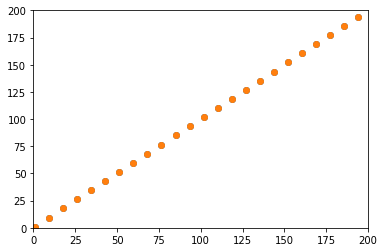

In [116]:
plt.scatter(X_p, X_p)
plt.scatter(X_p, y_p)
plt.axis([0, 200, 0, 200])
plt.show()

Рисовать датасет на обычном мастштабе бессмысленно, так как точки двух больших множеств из-за очень маленького расстояния между ними по Y-у  слипаются. Но в том и был поинт! (pun not intended) Давайте посмотрим на другом масштабе. каждая желтая точка на графике сверху выглядит примерно так.

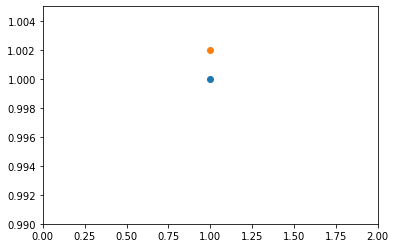

In [117]:
plt.scatter(X_p, X_p)
plt.scatter(X_p, y_p)
plt.axis([0, 2, 0.99, 1.005])
plt.show()

In [118]:
#проведем тестирование
my_knn = KNeighborsClassifier()
my_log = LogisticRegression()

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23)
print('cross_val_score - knn:', cross_val_score(my_knn, X, y, cv=5, scoring='accuracy').mean())
print('cross_val_score - logreg:', cross_val_score(my_log, X, y, cv=5, scoring='accuracy').mean())
my_knn.fit(X_train, y_train)
res_knn = my_knn.predict(X_test)
print('accuracy_score - knn:', accuracy_score(res_knn, y_test))
my_log.fit(X_train, y_train)
res_log = my_log.predict(X_test)
print('accuracy_score - logreg:', accuracy_score(res_log, y_test))

cross_val_score - knn: 0.5249999999999999
cross_val_score - logreg: 1.0
accuracy_score - knn: 0.21666666666666667
accuracy_score - logreg: 0.4


C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

Ура! получилось!!!  Т. е. обе функции работают не очень хорошо, но разница заметна и она в два раза. При этом дело не в случайно попавшейся выборке, так как, проведя несколкьо тестов, получим те же результаты. Вот куча тестов с разным разрывом.

In [105]:
def generate_dataset(n):
    X = []
    y = []
    X.extend([[x, x] for x in np.linspace(1,1000, n)])
    X.extend([[x, x+0.002] for x in np.linspace(1,1000, n)])
    y.extend([1]*n)
    y.extend([0]*n)
    return X, y

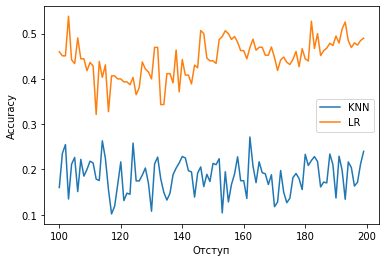

In [106]:
x_p, y_knn, y_log = [],[],[]
for i in range (100, 200):
    X, y = generate_dataset(i)
    my_knn = KNeighborsClassifier()
    my_log = LogisticRegression(solver='liblinear')
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23)
    my_knn.fit(X_train, y_train)
    res_knn = my_knn.predict(X_test)
    y_knn.append(accuracy_score(res_knn, y_test))
    my_log.fit(X_train, y_train)
    res_log = my_log.predict(X_test)
    y_log.append(accuracy_score(res_log, y_test))
    x_p.append(i)
plt.plot( x_p, y_knn, x_p, y_log)
plt.legend(['KNN','LR'])
plt.xlabel('Отступ')
plt.ylabel('Accuracy')
plt.show()

# Задание 2. Logistic regression performs worse than K-NN

Для того, чтобы зафейлить логистическую регрессию нам нужно создать такой датасет, который будет очень трудно разделить логистической кривой. Идеальным вариантом был бы круговой датасет, т. е. такой датасет, где внутри имеем скопление точек одного типа, а вокруг него на значительном расстоянии - плотный круг из точек другого типа.

In [107]:
from sklearn.datasets import make_circles
from matplotlib import pyplot
from pandas import DataFrame

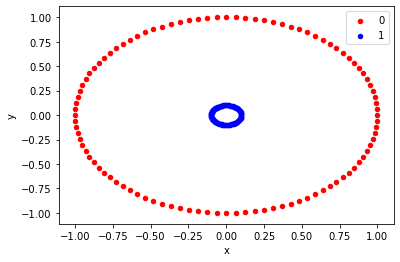

In [108]:
#credits к коду в ячейке: https://machinelearningmastery.com/generate-test-datasets-python-scikit-learn/
X, y = make_circles(n_samples=200, noise=0, factor = 0.1)
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

Так как  функция Logistic Regression не замкнутый круг, ей будет сложно. В свою же очередь k-NN должно сработать корректно, так как ближайшие друг к другу точки-соседи - все одного класса

In [109]:
my_knn = KNeighborsClassifier()
my_log = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23)
print('cross_val_score - knn:', cross_val_score(my_knn, X, y, cv=5, scoring='accuracy').mean())
print('cross_val_score - logreg:', cross_val_score(my_log, X, y, cv=5, scoring='accuracy').mean())
my_knn.fit(X_train, y_train)
res_knn = my_knn.predict(X_test)
print('accuracy_score - knn:', accuracy_score(res_knn, y_test))
my_log.fit(X_train, y_train)
res_log = my_log.predict(X_test)
print('accuracy_score - logreg:', accuracy_score(res_log, y_test))

cross_val_score - knn: 1.0
cross_val_score - logreg: 0.43500000000000005
accuracy_score - knn: 1.0
accuracy_score - logreg: 0.18


C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

Как видим, knn словно создана была для этого, а вот logistic regression не повезло

# Задание 3. k-NN with cosine distance perfoms better than k-NN with euclidean distance

https://arxiv.org/pdf/1708.04321.pdf 

В этой работе можно узнать, что, к примеру, датасет Iris является таковым, для которого K-NN с косинусным расстоянием будет лучше, Но так как мы ограничены двухмерным пространством, давайте искать альтернативное решение...

Нашел! Тот же самый датасет, что был в самом начале. Ключевое свойство этого датасета - что для верного определения принадлежности надо понять, что **главное** - это, чтобы точки лежали на одной прямой, обычное евклидово расстояние между ними не важно, а точнее, сильно сбивает, так как между объектами разных классов в заданном датасете оно меньше.
В свою же очередь угол между объектами на одной прямой меньше, чем между объектами на разной, так что, если мы применним spatial.distance.cosine как метрику датасет сработает

In [1]:
from scipy import spatial

In [3]:
X = []
y = []
X.extend([[x, x] for x in np.linspace(1,1000, 120)])
X.extend([[x, x+0.002] for x in np.linspace(1,1000, 120)])
y.extend([1]*120)
y.extend([0]*120)

euc_knn = KNeighborsClassifier(metric='euclidean')
cos_knn = KNeighborsClassifier(metric=spatial.distance.cosine)

 Я не буду еще раз визуализировать данные, так как визуализация уже есть выше

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23)
print('cross_val_score - euc_knn:', cross_val_score(euc_knn, X, y, cv=5, scoring='accuracy').mean())
print('cross_val_score - cos_knn:', cross_val_score(cos_knn, X, y, cv=5, scoring='accuracy').mean())
euc_knn.fit(X_train, y_train)
res_euc_knn = euc_knn.predict(X_test)
print('accuracy_score - euc_knn:', accuracy_score(res_euc_knn, y_test))
cos_knn.fit(X_train, y_train)
res_cos_knn = cos_knn.predict(X_test)
print('accuracy_score - logreg:', accuracy_score(res_cos_knn, y_test))

cross_val_score - euc_knn: 0.5249999999999999
cross_val_score - cos_knn: 1.0
accuracy_score - euc_knn: 0.21666666666666667
accuracy_score - logreg: 1.0


Ну вот, так и есть. Косинусная метрика справляется с поставленной задачей намного лучше